In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv')

#### Data Source: https://catalog.data.gov/dataset/united-states-covid-19-cases-and-deaths-by-state-over-time

In [3]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  60060 non-null  object 
 1   state            60060 non-null  object 
 2   tot_cases        60060 non-null  int64  
 3   conf_cases       34034 non-null  float64
 4   prob_cases       33962 non-null  float64
 5   new_case         60060 non-null  int64  
 6   pnew_case        56534 non-null  float64
 7   tot_death        60060 non-null  int64  
 8   conf_death       33273 non-null  float64
 9   prob_death       33273 non-null  float64
 10  new_death        60060 non-null  int64  
 11  pnew_death       56566 non-null  float64
 12  created_at       60060 non-null  object 
 13  consent_cases    50045 non-null  object 
 14  consent_deaths   51051 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 6.9+ MB


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,60060.00,34034.00,33962.00,60060.00,56534.00,60060.00,33273.00,33273.00,60060.00,56566.00
mean,656964.11,652799.39,107357.46,1601.41,267.29,9351.24,9015.95,1093.25,17.37,1.83
std,1173489.80,1077693.49,157946.54,5074.26,1439.17,14591.37,10431.92,1549.19,43.50,24.53
min,0.00,0.00,0.00,-10199.00,-171804.00,0.00,0.00,0.00,-352.00,-2594.00
25%,18303.25,65122.75,169.25,3.00,0.00,361.00,1377.00,0.00,0.00,0.00
50%,222841.50,299246.00,32175.00,344.00,1.00,3241.00,5193.00,309.00,3.00,0.00
75%,815855.25,842673.25,150251.25,1435.00,175.00,12353.25,13720.00,1691.00,16.00,1.00
max,11309237.00,10458792.00,850445.00,319809.00,171617.00,95604.00,71408.00,7889.00,1178.00,2919.00


In [7]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [8]:
df.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

##### Changing Data types in df

In [9]:
df.submission_date = pd.to_datetime(df.submission_date)

In [10]:
df.created_at = pd.to_datetime(df.created_at)

C:\Users\Chinyere\AppData\Local\Temp\ipykernel_17576\4045685855.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.created_at = pd.to_datetime(df.created_at)


In [11]:
df.dtypes

submission_date    datetime64[ns]
state                      object
tot_cases                   int64
conf_cases                float64
prob_cases                float64
new_case                    int64
pnew_case                 float64
tot_death                   int64
conf_death                float64
prob_death                float64
new_death                   int64
pnew_death                float64
created_at         datetime64[ns]
consent_cases              object
consent_deaths             object
dtype: object

In [12]:
len(df)

60060

##### Checking for Null Values

In [13]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         26026
prob_cases         26098
new_case               0
pnew_case           3526
tot_death              0
conf_death         26787
prob_death         26787
new_death              0
pnew_death          3494
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64

##### Handling Missing Values

In [14]:
df['conf_cases'].isnull().sum()

26026

In [15]:
df.conf_cases.fillna(df.conf_cases.mean(), inplace=True)

In [16]:
df.prob_cases.isnull().sum()

26098

In [17]:
df.prob_cases.fillna(df.prob_cases.mean(), inplace=True)

In [18]:
df.pnew_case.fillna(df.pnew_case.mean(), inplace=True)

In [19]:
df.conf_death.fillna(df.conf_death.mean(), inplace=True)

In [20]:
df.prob_death.fillna(df.prob_death.mean(), inplace=True)

In [21]:
df.pnew_death.fillna(df.pnew_death.mean(), inplace=True)

In [22]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases             0
prob_cases             0
new_case               0
pnew_case              0
tot_death              0
conf_death             0
prob_death             0
new_death              0
pnew_death             0
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64

In [23]:
df.sample(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
42427,2022-03-16,NH,300692,652799.39,107357.46,142,0.00,2428,9015.95,1093.25,4,0.00,2022-03-17 14:31:57,Not agree,Not agree
59995,2020-02-21,CO,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0.00,2020-02-21 00:00:00,Agree,Agree
37962,2020-04-13,CA,22348,22348.00,0.00,554,0.00,658,658.00,0.00,38,0.00,2020-04-15 00:00:00,Agree,Agree
10723,2021-04-08,CO,482606,450566.00,32040.00,1854,185.00,6143,5410.00,733.00,4,0.00,2021-04-08 00:00:00,Agree,Agree
30593,2022-10-02,VT,132315,652799.39,107357.46,0,0.00,685,9015.95,1093.25,0,0.00,2022-10-03 13:41:36,Not agree,Not agree


In [26]:
df.consent_deaths = df.consent_deaths.str.strip().fillna('Agree')

In [31]:
df.consent_cases = df.consent_cases.str.strip().fillna('Agree')

In [35]:
df.isnull().sum()

submission_date    0
state              0
tot_cases          0
conf_cases         0
prob_cases         0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
consent_cases      0
consent_deaths     0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  60060 non-null  datetime64[ns]
 1   state            60060 non-null  object        
 2   tot_cases        60060 non-null  int64         
 3   conf_cases       60060 non-null  float64       
 4   prob_cases       60060 non-null  float64       
 5   new_case         60060 non-null  int64         
 6   pnew_case        60060 non-null  float64       
 7   tot_death        60060 non-null  int64         
 8   conf_death       60060 non-null  float64       
 9   prob_death       60060 non-null  float64       
 10  new_death        60060 non-null  int64         
 11  pnew_death       60060 non-null  float64       
 12  created_at       60060 non-null  datetime64[ns]
 13  consent_cases    60060 non-null  object        
 14  consent_deaths   60060 non-null  objec

In [37]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-03-11,KS,297229,241035.00,56194.00,0,0.00,4851,9015.95,1093.25,0,0.00,2021-03-12 15:20:13,Agree,Agree
1,2021-12-01,ND,163565,135705.00,27860.00,589,220.00,1907,9015.95,1093.25,9,0.00,2021-12-02 14:35:20,Agree,Not agree
2,2022-01-02,AS,11,652799.39,107357.46,0,0.00,0,9015.95,1093.25,0,0.00,2022-01-03 15:18:16,Agree,Agree
3,2021-11-22,AL,841461,620483.00,220978.00,703,357.00,16377,12727.00,3650.00,7,3.00,2021-11-22 00:00:00,Agree,Agree
4,2022-05-30,AK,251425,652799.39,107357.46,0,0.00,1252,9015.95,1093.25,0,0.00,2022-05-31 13:20:20,Agree,Agree


In [39]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [44]:
Top_dead = df.nlargest(10, columns='tot_death')

In [49]:
Top_dead

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
28617,2022-10-18,CA,11309237,10458792.00,850445.00,0,0.00,95604,9015.95,1093.25,0,0.00,2022-10-19 13:15:24,Agree,Not agree
35831,2022-10-14,CA,11309237,10458792.00,850445.00,3571,3571.00,95604,9015.95,1093.25,0,0.00,2022-10-15 13:14:59,Agree,Not agree
36854,2022-10-13,CA,11305666,10458792.00,846874.00,21329,0.00,95604,9015.95,1093.25,190,0.00,2022-10-14 13:18:04,Agree,Not agree
38607,2022-10-16,CA,11309237,10458792.00,850445.00,0,0.00,95604,9015.95,1093.25,0,0.00,2022-10-17 13:39:58,Agree,Not agree
39121,2022-10-17,CA,11309237,10458792.00,850445.00,0,0.00,95604,9015.95,1093.25,0,0.00,2022-10-18 13:16:07,Agree,Not agree
44238,2022-10-15,CA,11309237,10458792.00,850445.00,0,0.00,95604,9015.95,1093.25,0,0.00,2022-10-16 13:16:00,Agree,Not agree
16698,2022-10-06,CA,11278564,10437463.00,841101.00,25111,0.00,95414,9015.95,1093.25,249,0.00,2022-10-07 13:15:05,Agree,Not agree
17007,2022-10-09,CA,11284337,10437463.00,846874.00,0,0.00,95414,9015.95,1093.25,0,0.00,2022-10-10 13:19:00,Agree,Not agree
19217,2022-10-12,CA,11284337,10437463.00,846874.00,0,0.00,95414,9015.95,1093.25,0,0.00,2022-10-13 13:16:52,Agree,Not agree
19794,2022-10-10,CA,11284337,10437463.00,846874.00,0,0.00,95414,9015.95,1093.25,0,0.00,2022-10-11 13:18:13,Agree,Not agree


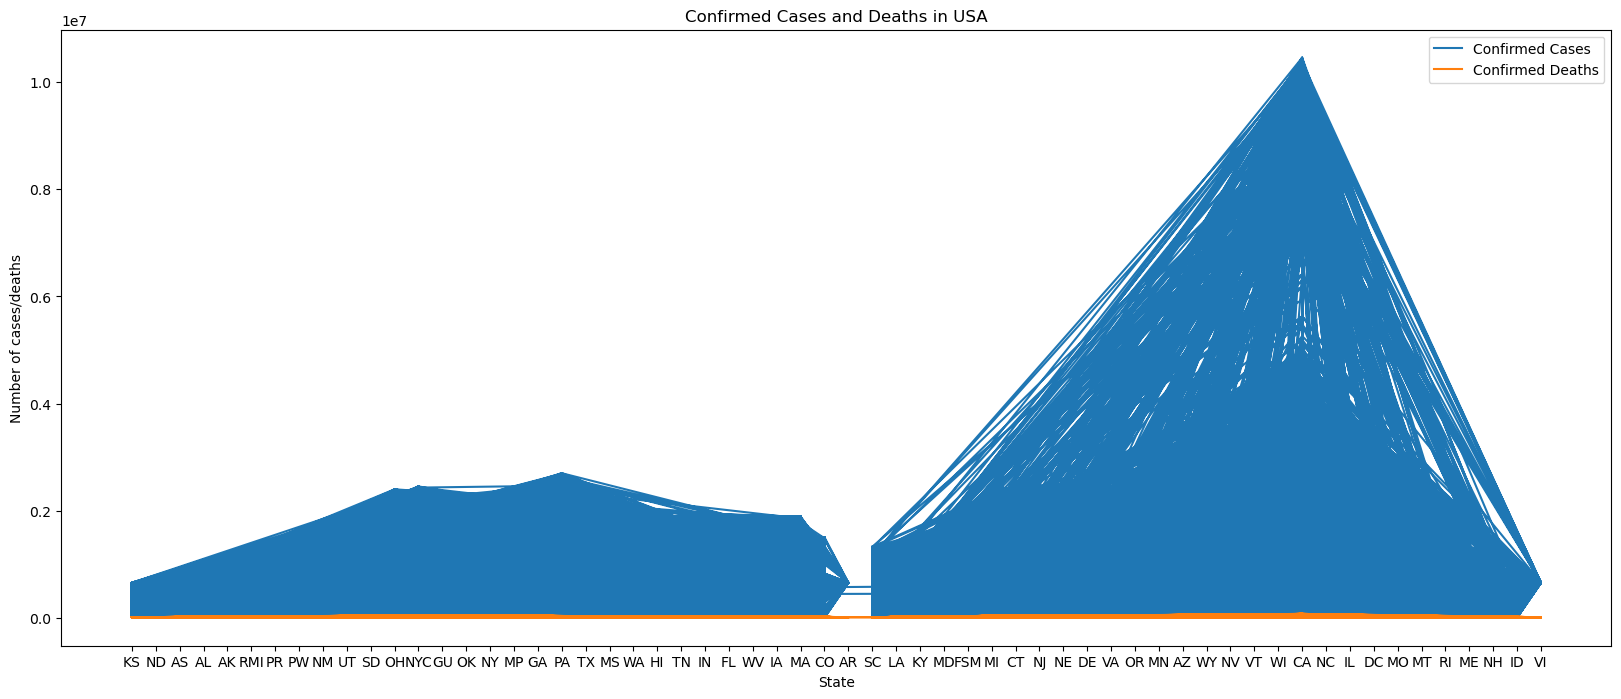

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(df['state'], df['conf_cases'], label='Confirmed Cases')
plt.plot(df['state'], df['conf_death'], label='Confirmed Deaths')
plt.title("Confirmed Cases and Deaths in USA")
plt.xlabel('State')
plt.ylabel('Number of cases/deaths')
plt.legend()
plt.show()

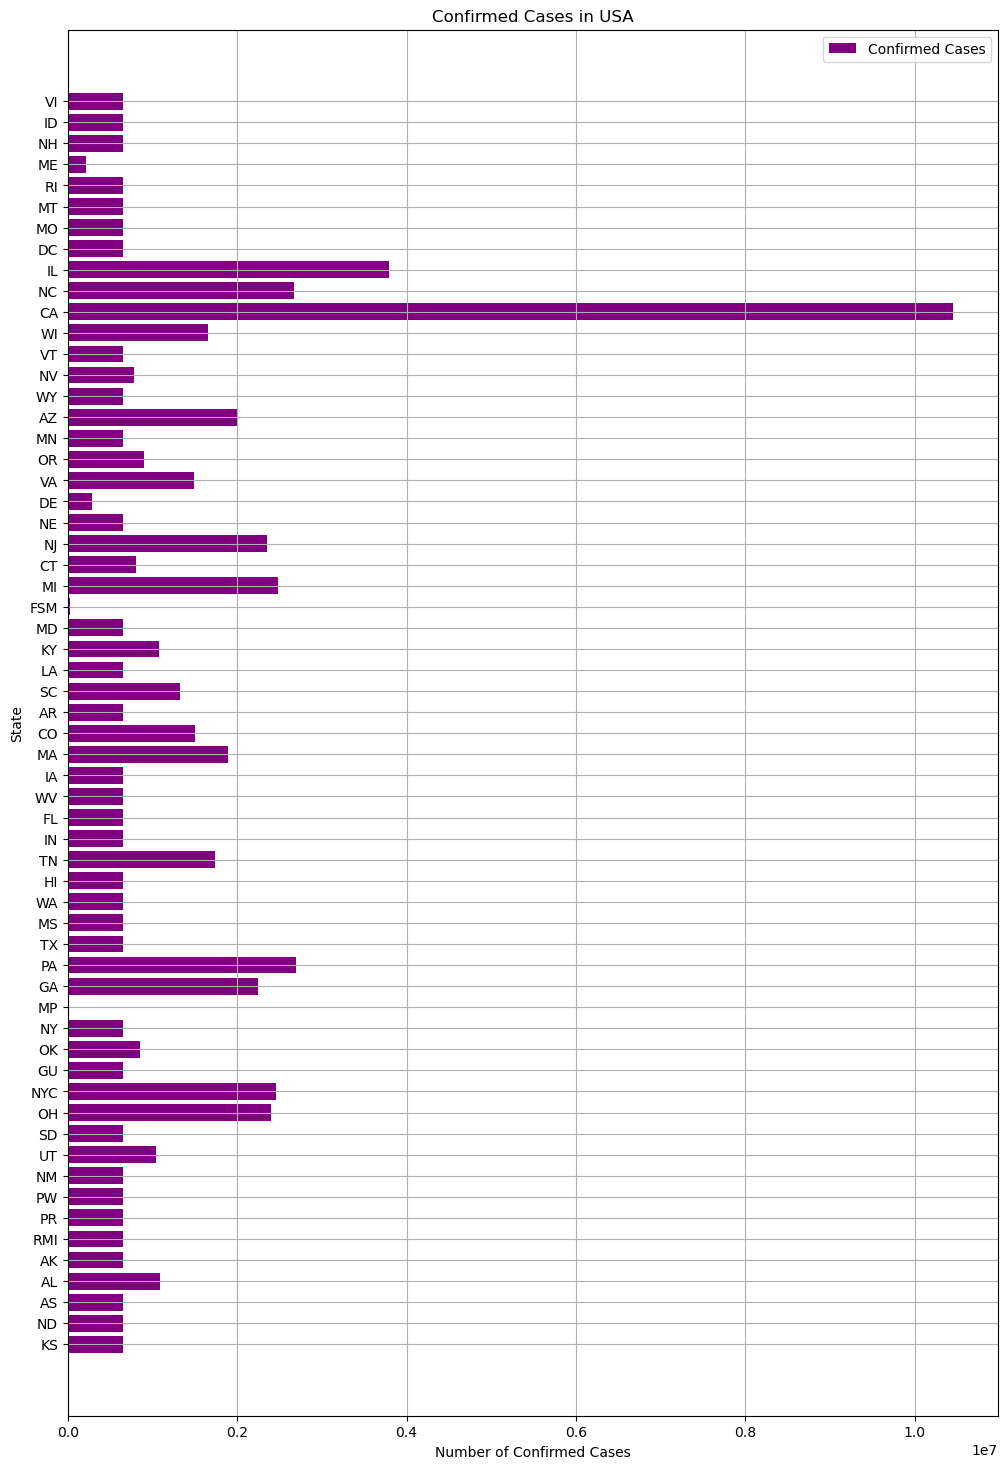

In [52]:
# Plot for Confirmed Cases

fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(df['state'], df['conf_cases'], label='Confirmed Cases', color='purple')
ax.set_title("Confirmed Cases in USA")
ax.set_xlabel('Number of Confirmed Cases')
ax.set_ylabel('State')
ax.legend()
ax.grid(True)
plt.show()

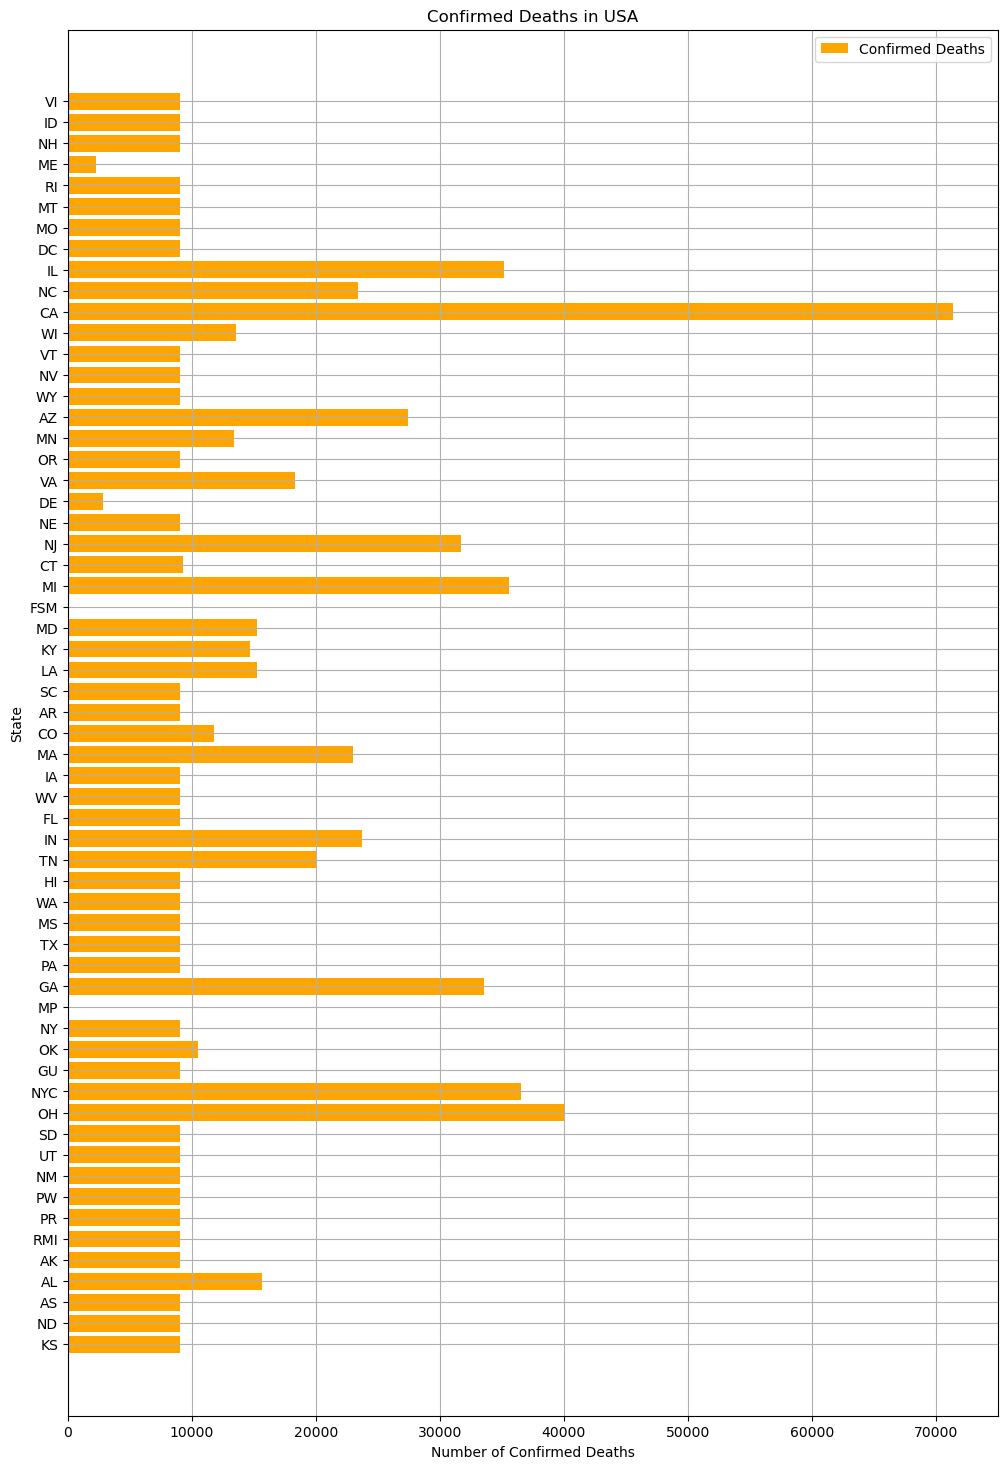

In [53]:
# Plot for Confirmed Deaths

fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(df['state'], df['conf_death'], label='Confirmed Deaths', color='orange')
ax.set_title("Confirmed Deaths in USA")
ax.set_xlabel('Number of Confirmed Deaths')
ax.set_ylabel('State')
ax.legend()
ax.grid(True)
plt.show()

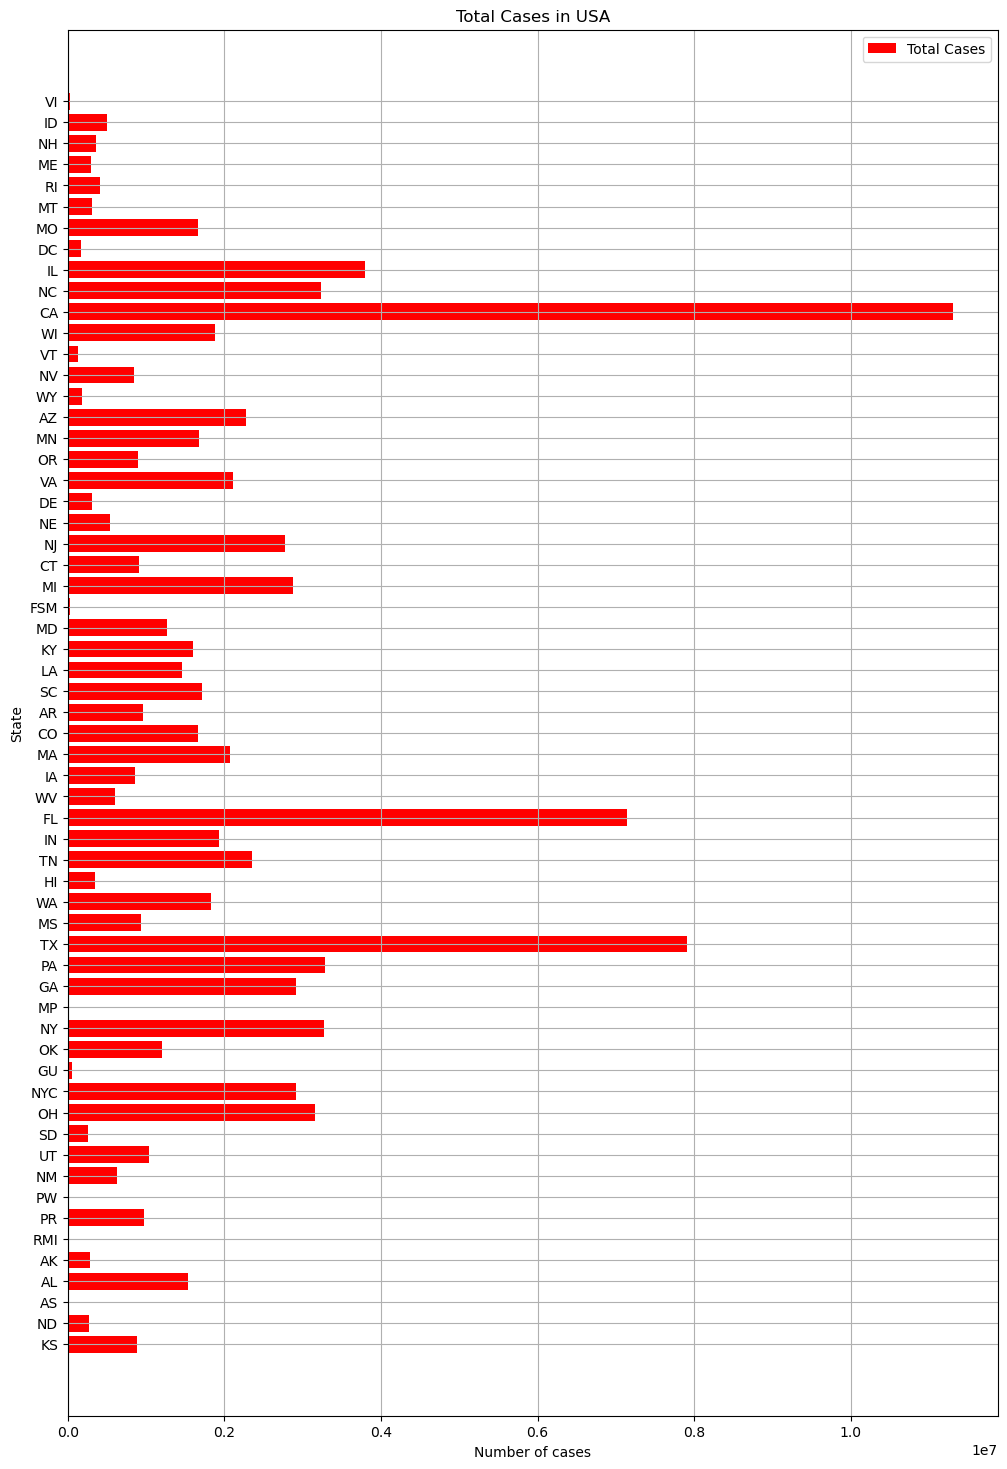

In [54]:
# Plot for Total Cases

fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(df['state'], df['tot_cases'], label='Total Cases', color='red')
ax.set_title("Total Cases in USA")
ax.set_xlabel('Number of cases')
ax.set_ylabel('State')
ax.legend()
ax.grid(True)
plt.show()

In [55]:
df.to_csv('COVID_data.csv')